In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
beer=pd.read_csv('C:\\UpGrad\\e-commers\\beer_data.csv')

- We load the dataset using pandas

In [3]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


- We can see that 100 review profile names are missing.
- We can either drop the rows or we can substitute it with max times occuring user.

In [4]:
beer.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


In [5]:
beer.isnull().sum()/len(beer)

beer_beerid           0.00000
review_profilename    0.00021
review_overall        0.00000
dtype: float64

In [6]:
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [7]:
beer['review_profilename'].astype('category').value_counts()[:10]

northyorksammy    1846
mikesgroove       1379
BuckeyeNation     1338
Thorpe429         1072
ChainGangGuy      1046
NeroFiddled       1031
womencantsail     1013
brentk56          1000
WesWes             977
Phyl21ca           973
Name: review_profilename, dtype: int64

In [8]:
beer.drop(index=beer[beer['review_profilename'].isnull()].index,inplace=True)

- We choose to drop the rows rather than substitution as the missing data accounts for less than 1%.

In [9]:
beer['review_profilename']=beer['review_profilename'].map(lambda x:x.lower())

- We covert all the reviewers names to lower case so that it is easy to identify duplicate rows.

In [10]:
beer.drop_duplicates(inplace=True)

- We drop the duplicate rows.

In [11]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475304 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475304 non-null int64
review_profilename    475304 non-null object
review_overall        475304 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [12]:
(475304/475984)*100

99.85713805506067

- We still have more that 99% of the data.

<h3>Data preparation</h3>

- Choose only those beers that have at least N number of reviews.
- Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.

In [13]:
beer['beer_beerid'].astype('category').value_counts().mean()

11.792973402143708

In [14]:
beer['review_profilename'].astype('category').value_counts().mean()

21.127439214117437

In [15]:
len(np.unique(beer['beer_beerid']))

40304

- Their are 40304 unique beers present

In [16]:
len(np.unique(beer['review_profilename']))

22497

- Their are 22497 unique reviewers.

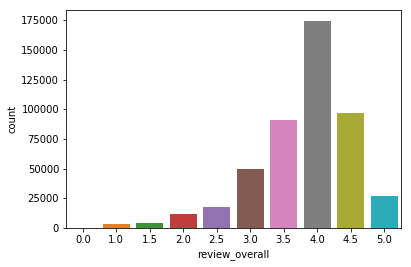

In [17]:
sns.countplot('review_overall',data=beer)

- Most of the rating given is 4.
- We choose the avg beer rating as 3 to recommend to user.
- As some beers might have less review and higher rating thus we set atleast review count in next steps.

In [18]:
beer['beer_beerid'].astype('category').value_counts().quantile([0.25,0.5,0.75,0.9,1])

0.25      1.0
0.50      2.0
0.75      5.0
0.90     21.0
1.00    980.0
Name: beer_beerid, dtype: float64

- In order to choose the beers with atleast no of reviews we see that in the above output 75% of the beers have review less than 5.
- So we choose only the top 25% of the beers to recommend to users.
- Thus we set limit of beers having atleat 5 reviews.

In [19]:
x=beer['beer_beerid'].astype('category').value_counts()>=5

In [20]:
len(x[x.values==True].index)

11072

- Their are 11072 unique beers with >=5 reviews

In [21]:
len(beer['review_overall']>=3)

475304

In [22]:
beer=beer[beer['beer_beerid'].isin(x[x.values==True].index)]

- Here we choose only the beers with reviews >=5.

In [23]:
sum(beer.pivot_table(aggfunc=np.mean,index='beer_beerid',values='review_overall')['review_overall']<3)

682

In [24]:
pvt=beer.pivot_table(aggfunc=np.mean,index='beer_beerid',values='review_overall')

In [25]:
len(pvt[pvt['review_overall']>=3])

10390

In [26]:
beer=beer[beer['beer_beerid'].isin(pvt[pvt['review_overall']>=3].index)]

- Here we choose the beers with avg overall rating >=3 from the beers which have reviews >=5.

<h3>Data exploration</h3>
- What are the unique values of ratings?

In [27]:
np.unique(beer['review_overall'])

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

- Visualise the rating values and notice:
 - The average beer ratings

In [28]:
beer.pivot_table(index='beer_beerid',values='review_overall',aggfunc=np.mean).sort_values(by='review_overall',ascending=False)[:10]

,review_overall
beer_beerid,
54806,5.000000
54147,4.916667
47402,4.900000
63649,4.875000
44910,4.866667
59147,4.833333
41786,4.833333
24273,4.812500
68548,4.789474


- Top 10 beer ratings.

- The average user ratings

In [29]:
beer.pivot_table(index='review_profilename',values='review_overall',aggfunc=np.mean).sort_values(by='review_overall',ascending=False)[:10]

,review_overall
review_profilename,
boag2k5,5.0
brent281,5.0
brenttt,5.0
mandolzinn,5.0
brett1989h,5.0
b33rkrazz,5.0
b0r3dguy,5.0
brettr,5.0
mandarin,5.0


- top 10 of the users have given the avg rating as 5.

- The average number of ratings given to the beers

In [30]:
len(beer) / len(np.unique(beer['beer_beerid']))

39.63378248315688

- No of ratings given is actually the len of beer dataset and we divide by unique count of beerid's

- The average number of ratings given by the users

In [31]:
len(beer) / len(np.unique(beer['review_profilename']))

19.442634560906516

- On the similar lines.Avg no of rating given by users is as above.

<h3>Recommendation Models</h3>

- Divide your data into training and testing dataset.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_data,test_data=train_test_split(beer,test_size=0.3,random_state=100)

### Copy train and test dataset
These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the beers which has not been rated by the user. To ignore the beers rated by the user, we will mark it as 0 during prediction. The beers not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [34]:
dummay_train=train_data.copy()
dummay_test=test_data.copy()

In [35]:
dummay_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288256 entries, 399508 to 345091
Data columns (total 3 columns):
beer_beerid           288256 non-null int64
review_profilename    288256 non-null object
review_overall        288256 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.8+ MB


In [36]:
dummay_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123539 entries, 304039 to 385634
Data columns (total 3 columns):
beer_beerid           123539 non-null int64
review_profilename    123539 non-null object
review_overall        123539 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.8+ MB


In [37]:
dummay_train['review_overall']=dummay_train['review_overall'].map(lambda x:0 if x>=1 else 1)

In [38]:
dummay_test['review_overall']=dummay_test['review_overall'].map(lambda x:1 if x>=1 else 0)

In [39]:
train_data.head()

,beer_beerid,review_profilename,review_overall
399508,34631,urbancaver,4.5
196480,3797,buckeyenation,4.0
367457,6803,mdagnew,4.0
73073,3490,korguy123,3.5
144784,11888,blackhaddock,2.5


In [40]:
dummay_train.head()

,beer_beerid,review_profilename,review_overall
399508,34631,urbancaver,0
196480,3797,buckeyenation,0
367457,6803,mdagnew,0
73073,3490,korguy123,0
144784,11888,blackhaddock,0


In [41]:
len(np.unique(dummay_train['review_profilename']))

18651

In [42]:
sum(dummay_train.duplicated(subset='review_profilename'))

269605

In [43]:
sum(beer.duplicated())

0

In [44]:
df_train=train_data.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').fillna(0)

In [45]:
# The beers not rated by user is marked as 1 for prediction. 
dummay_train = dummay_train.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').fillna(1)

# The beers not rated by user is marked as 0 for evaluation.
dummay_test = dummay_test.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').fillna(0)

In [46]:
df_train.head()

beer_beerid,4,5,6,7,8,9,10,11,12,13,...,75978,76144,76170,76192,76323,76375,76440,76521,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.metrics.pairwise import pairwise_distances


### Normalising the rating of the movie for each user aroung 0 mean
- ratings are in range of 5 but still it is better to normalise the data

In [48]:
mean = np.mean(df_train, axis=1)
df_sub= (df_train.T-mean).T

### User Similarity Matrix

In [49]:
user_corr=1-pairwise_distances(df_sub,metric='cosine')

In [50]:
user_corr[np.isnan(user_corr)]=0

In [51]:
user_corr

array([[ 1.00000000e+00,  3.47309287e-02, -6.72019476e-04, ...,
        -6.92705744e-04, -6.92705744e-04, -4.89793348e-04],
       [ 3.47309287e-02,  1.00000000e+00, -6.69660052e-04, ...,
        -6.90273692e-04, -6.90273692e-04, -4.88073710e-04],
       [-6.72019476e-04, -6.69660052e-04,  1.00000000e+00, ...,
        -1.86834281e-04, -1.86834281e-04, -1.32105427e-04],
       ...,
       [-6.92705744e-04, -6.90273692e-04, -1.86834281e-04, ...,
         1.00000000e+00, -1.92585460e-04, -1.36171929e-04],
       [-6.92705744e-04, -6.90273692e-04, -1.86834281e-04, ...,
        -1.92585460e-04,  1.00000000e+00, -1.36171929e-04],
       [-4.89793348e-04, -4.88073710e-04, -1.32105427e-04, ...,
        -1.36171929e-04, -1.36171929e-04,  1.00000000e+00]])

In [52]:
user_corr[user_corr<0]=0
user_corr

array([[1.        , 0.03473093, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03473093, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

#### Determine how similar the first 10 users are to each other and visualise it.

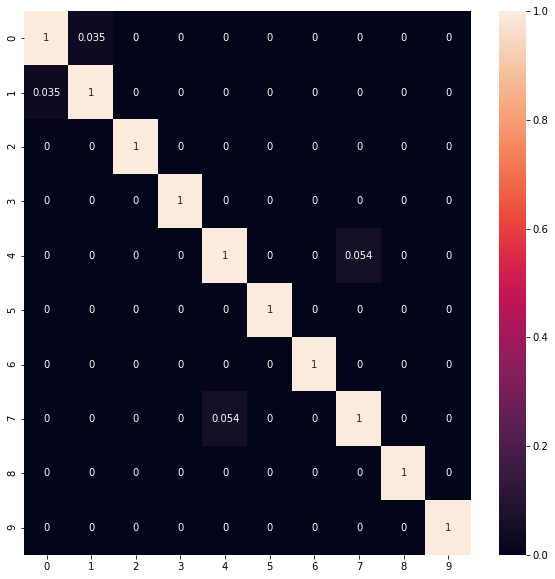

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(data=user_corr[:10,:10],annot=True)

- we see the users are not much correlated

In [54]:
user_corr.shape

(18651, 18651)

In [55]:
user_predicted_ratings = np.dot(user_corr,df_train)
user_predicted_ratings

array([[ 0.01908227,  5.71674532, 11.53025492, ...,  0.08442086,
         1.02306491,  1.47601484],
       [ 0.18360772,  3.52395262,  9.14033536, ...,  0.4094945 ,
         0.9897446 ,  0.95693223],
       [ 0.        ,  2.1508505 ,  5.48790672, ...,  0.        ,
         0.19088663,  0.1806675 ],
       ...,
       [ 0.        ,  1.71579132,  1.15689957, ...,  0.09914584,
         0.        ,  0.        ],
       [ 0.        ,  1.09925116,  3.16148025, ...,  0.41775578,
         0.        ,  0.11684195],
       [ 0.        ,  2.57075559,  4.95618724, ...,  0.3700521 ,
         0.        ,  0.53212498]])

In [56]:
user_predicted_ratings.shape

(18651, 10387)

In [57]:
user_final_rating = np.multiply(user_predicted_ratings,dummay_train)
user_final_rating.head()

beer_beerid,4,5,6,7,8,9,10,11,12,13,...,75978,76144,76170,76192,76323,76375,76440,76521,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.019082,5.716745,11.530255,8.374359,1.064254,1.141108,12.527709,0.965449,1.352472,0.781983,...,0.759211,1.486258,0.090257,0.293728,1.316045,0.450151,0.152011,0.084421,1.023065,1.476015
05harley,0.183608,3.523953,9.140335,6.530763,1.545981,1.617318,10.067152,0.419322,0.887765,0.631186,...,0.557462,1.317255,0.447627,0.085162,0.662739,0.540063,0.361634,0.409495,0.989745,0.956932
0beerguy0,0.000000,2.150851,5.487907,4.296707,2.286272,0.949785,3.191319,0.228107,0.225194,0.475921,...,0.000000,0.425614,0.000000,0.000000,0.283529,0.211235,0.347247,0.000000,0.190887,0.180668
0runkp0s,0.000000,1.017649,2.605356,0.951787,0.040481,0.000000,0.562386,0.000000,0.323072,0.542448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264785
0tt0,0.140423,6.801433,13.334475,8.669468,1.351657,2.172283,15.220184,1.204754,1.319164,0.609007,...,0.242923,2.315910,0.180811,0.191511,1.267515,0.483265,0.496256,0.088829,0.892919,1.315255


#### Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.
- Below are the beers which will be recommended to users cokes,genog,giblet.Based on user similarity.

In [58]:
user_final_rating.loc['cokes',:].sort_values(ascending=False)[0:5]

beer_beerid
2093    68.185981
412     64.364253
1093    64.241568
4083    62.412995
1904    60.123031
Name: cokes, dtype: float64

In [59]:
user_final_rating.loc['genog',:].sort_values(ascending=False)[0:5]

beer_beerid
1093    85.774547
2093    85.064188
412     81.722844
4083    78.148021
1904    76.274076
Name: genog, dtype: float64

In [60]:
user_final_rating.loc['giblet',:].sort_values(ascending=False)[0:5]

beer_beerid
2093    75.889773
412     66.983235
1904    63.960063
1093    63.494228
88      63.133827
Name: giblet, dtype: float64

- Top 5 of the beers recommended for these users are almost same,which indicates they have similar taste.

### Item Based Similarity

In [61]:
df_train_item=train_data.pivot_table(index='beer_beerid',columns='review_profilename',values='review_overall')

In [62]:
df_train_item.head()

review_profilename,0110x011,05harley,0beerguy0,0runkp0s,0tt0,1000bottles,1001111,100floods,1050sudz,108dragons,...,zymasefungii207i,zymrgy,zymurgized,zymurgo,zymurgy4all,zymurgywhiz,zythus,zywiec06,zyzygy,zzyzx
beer_beerid,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Normalizing the data.

In [63]:
itm_mean=np.nanmean(df_train_item,axis=1)

In [64]:
df_sub_itm=(df_train_item.T-itm_mean).T

In [65]:
df_sub_itm.head()

review_profilename,0110x011,05harley,0beerguy0,0runkp0s,0tt0,1000bottles,1001111,100floods,1050sudz,108dragons,...,zymasefungii207i,zymrgy,zymurgized,zymurgo,zymurgy4all,zymurgywhiz,zythus,zywiec06,zyzygy,zzyzx
beer_beerid,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Finding the cosine similarity.

In [66]:
itm_pair_dist=1-pairwise_distances(df_sub_itm.fillna(0),metric='cosine')

In [67]:
itm_pair_dist[np.isnan(itm_pair_dist)]=0

In [68]:
itm_pair_dist[itm_pair_dist<0]=0

Filtering only the positively correlated once.

#### Compute and visualise the similarity between the first 10 beers.

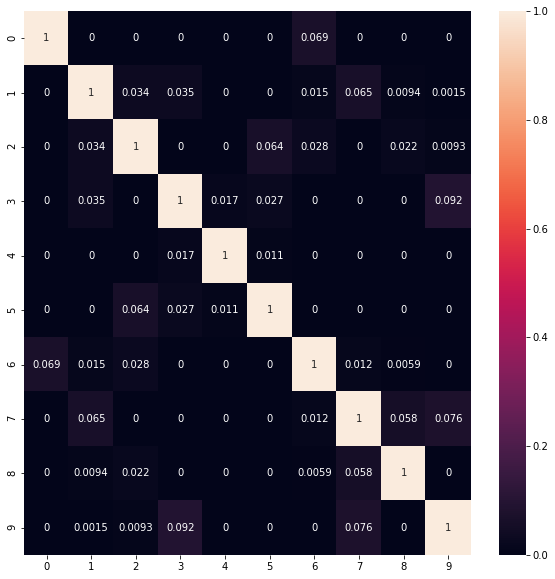

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(itm_pair_dist[:10,:10],annot=True)

- We see from the above plot first 10 beers are some what correlated but still the values are close to zero.

In [70]:
item_pred=np.dot(df_train_item.fillna(0).T,itm_pair_dist)

In [71]:
item_pred.shape

(18651, 10387)

In [72]:
dummay_train.shape

(18651, 10387)

#### Filtering the rating only for the beers not rated by the user for recommendation

In [73]:
item_pred_final=np.multiply(item_pred,dummay_train)

In [74]:
item_pred_final.head()

beer_beerid,4,5,6,7,8,9,10,11,12,13,...,75978,76144,76170,76192,76323,76375,76440,76521,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.096115,0.347518,0.753063,0.347964,0.286861,0.259987,0.869611,0.154117,0.777981,0.066728,...,0.0,1.168326,0.019115,0.0,0.375356,0.000000,0.147448,0.064118,0.590142,0.278257
05harley,0.182994,0.253105,0.714858,0.430836,0.793522,0.555376,0.676605,0.045130,0.216784,0.063807,...,0.0,0.847910,0.055871,0.0,0.000000,0.678841,0.331965,0.073154,0.173195,0.078228
0beerguy0,0.000000,0.330983,0.109851,0.000000,0.197135,0.025036,0.295974,0.513692,0.000000,0.006466,...,0.0,0.192892,0.000000,0.0,0.000000,0.140752,0.000000,0.000000,0.000000,0.002954
0runkp0s,0.000000,0.000000,0.000000,0.012441,0.373219,0.000000,0.000000,0.000000,0.008787,0.062880,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010329
0tt0,0.065612,0.064554,0.693406,0.175529,0.097303,0.378745,0.228729,0.171138,0.200768,0.163012,...,0.0,0.005575,0.158748,0.0,0.000000,0.361076,0.034617,0.160128,0.012849,0.192672


 - Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [75]:
item_pred_final.loc['cokes',:].sort_values(ascending=False)[0:5]

beer_beerid
40941    20.236332
2937     19.963178
995      18.096776
2746     17.537054
3619     17.397952
Name: cokes, dtype: float64

In [76]:
item_pred_final.loc['genog',:].sort_values(ascending=False)[0:5]

beer_beerid
38094    6.104586
41690    6.012487
34363    5.968117
34094    5.929189
34362    5.820959
Name: genog, dtype: float64

In [77]:
item_pred_final.loc['giblet',:].sort_values(ascending=False)[0:5]

beer_beerid
69909    4.831629
8116     4.537562
13845    4.506807
3422     4.477502
9777     4.397672
Name: giblet, dtype: float64

- We see the beers recommended are not common among the 3 users.

### Evaluation

- Evaluation will be same as the prediction. The only difference being, we will evaluate for the beers already rated by the user insead of predicting it for the beers not rated by the users. 

### Using User Similarity

In [78]:
user_test_data_pivot=test_data.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall').fillna(0)

In [79]:
mn=np.mean(user_test_data_pivot,axis=1)
user_test_data_pivot=(user_test_data_pivot.T-mn).T

In [80]:
user_pair_test=1-pairwise_distances(user_test_data_pivot,metric='cosine')

In [81]:
user_pair_test[user_pair_test<0]=0

In [82]:
user_pair_test.shape

(13535, 13535)

In [83]:
user_test_data_pivot.shape

(13535, 9924)

In [84]:
user_test_pred=np.dot(user_pair_test,user_test_data_pivot)

#### Doing prediction for the beers rated by the user

In [85]:
user_test_fin=np.multiply(user_test_pred,dummay_test)

In [86]:
user_test_fin.head()

beer_beerid,4,5,6,7,8,9,10,11,12,13,...,75978,76144,76170,76192,76323,76375,76440,76521,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
01ryan10,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
04101brewer,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
05harley,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
0beerguy0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [87]:
from sklearn.preprocessing import MinMaxScaler

#### Calculating the RMSE for only the beers rated by user. For  RMSE, normalising the rating to (1,5) range. 

In [88]:
X=user_test_fin.copy()
X=X[X>0]
scaler=MinMaxScaler(feature_range=(1,5))
scaler.fit(X)
y=scaler.transform(X)

In [89]:
y

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [90]:
tot_nonzero=np.count_nonzero(~np.isnan(y))

In [1]:
# Use only when memory error
# %xdel df_sub
# %xdel df_train
# %xdel df_train_item
# %xdel df_sub_itm
# %xdel item_pred
# %xdel item_pred_final
# %xdel itm_pair_dist
# %xdel train_data

In [92]:
test_user=test_data.pivot_table(index='review_profilename',columns='beer_beerid',values='review_overall')

In [93]:
rmse=(sum(((test_user-y)**2).sum())/tot_nonzero)**0.5

In [94]:
rmse

1.9731033399797173

### Using Item similarity

In [95]:
item_test=test_user.T

In [96]:
mn=np.nanmean(item_test,axis=1)
item_sub_test=(item_test.T-mn).T

test_item_correlation = 1 - pairwise_distances(item_sub_test.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [97]:
item_test_fin=np.dot(test_item_correlation,item_test.fillna(0)).T
item_final_test=np.multiply(item_test_fin,dummay_test)

In [98]:
item_final_test.head()

beer_beerid,4,5,6,7,8,9,10,11,12,13,...,75978,76144,76170,76192,76323,76375,76440,76521,76525,76816
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
X=item_final_test.copy()
X=X[X>0]
scaler=MinMaxScaler(feature_range=(1,5))
scaler.fit(X)
y_item=scaler.transform(X)

C:\Users\u6048368\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\u6048368\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


#### Finding RMSE

In [100]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [101]:
rmse_item=(sum(((test_user-y_item)**2).sum())/total_non_nan)**0.5

In [102]:
rmse_item

2.284369150863591

<b>Compare the performance of the two models using test data and suggest the one that should be deployed.</b>

- We see that RMSE for user similarity is 1.97 where as for item similarity is 2.28 which is higher,So we recommend user similarity to be deployed.